<a href="https://colab.research.google.com/github/Thcataclismo/Analise-de-vendas/blob/main/analise_de_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Vamos começar importando Bibliotecas**

In [1]:

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dados = pd.read_csv('/content/market.csv')
dados.shape

(1000, 17)

In [6]:
dados

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


### **Limpeza de dados**

In [8]:
dados.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

### Não há valores ausentes e o conjunto de dados está limpo, então continuaremos com a visualização de dados.

### **Verificando as informações do conjunto de dados.**

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [12]:
dados.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


### **Verificando o número de linhas e coluna**

In [14]:
print("Dataset contains {} row and {} colums".format(dados.shape[0],dados.shape[1]))

Dataset contains 1000 row and 17 colums


### **Visualização**

### Agora usamos diferentes ferramentas de visualização para verificar diferentes aspectos das vendas do Supermercado.

### Vamos começar com a contagem de gênero

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


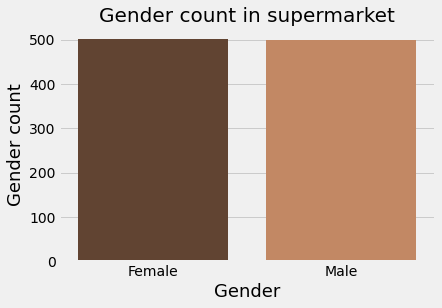

In [16]:
plt.style.use('fivethirtyeight')
ax= sns.countplot('Gender', data=dados , palette = 'copper')
ax.set_xlabel(xlabel= "Gender",fontsize=18)
ax.set_ylabel(ylabel = "Gender count", fontsize = 18)
ax.set_title(label = "Gender count in supermarket", fontsize = 20)
plt.show()

### Aqui podemos ver que o número de homens e mulheres entrando na loja é quase igual. Mas a visualização parece suspeita. Vamos verificar os dados numéricos.

In [17]:
dados.groupby(['Gender']). agg({'Total':'sum'})

,Total
Gender,
Female,167882.925
Male,155083.824


### A visualização parece boa. Vamos continuar.

### **Tipo de Cliente**

Text(0, 0.5, 'Customer Count')

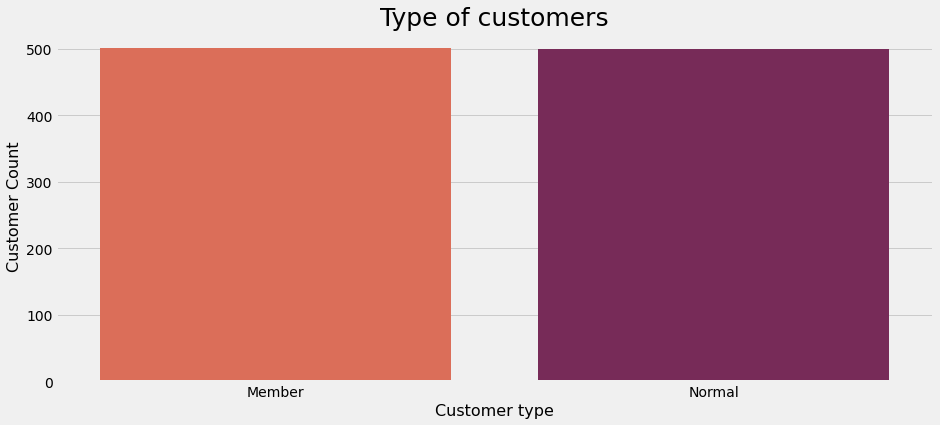

In [19]:
plt.figure(figsize= (14,6))
ax = sns.countplot(x = "Customer type", data = dados, palette = "rocket_r")
ax.set_title("Type of customers", fontsize = 25)
ax.set_xlabel("Customer type", fontsize = 16)
ax.set_ylabel("Customer Count", fontsize = 16)

### A visualização parece suspeita, vamos verificar os dados numéricos.

In [20]:
dados.groupby(['Customer type']). agg({'Total':'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


### Acima, podemos ver o tipo de cliente em todas as filiais combinadas, agora vamos verificar as diferentes filiais.

Text(0, 0.5, 'Customer Count')

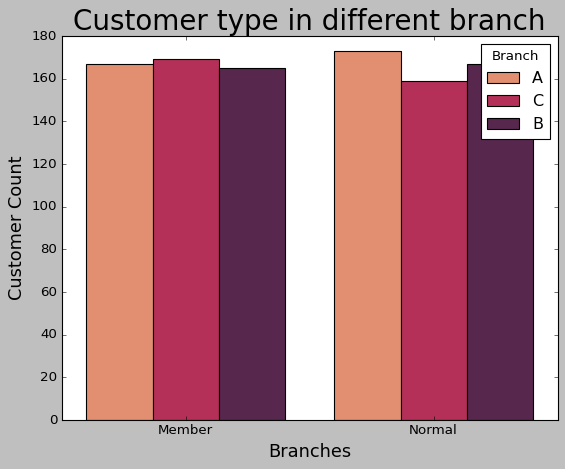

In [21]:
plt.style.use('classic')
ax = sns.countplot(x = "Customer type", hue = "Branch", data = dados, palette= "rocket_r")
ax.set_title(label = "Customer type in different branch", fontsize = 25)
ax.set_xlabel(xlabel = "Branches", fontsize = 16)
ax.set_ylabel(ylabel = "Customer Count", fontsize = 16)

### **Verificação dos diferentes métodos de pagamento utilizados.**

Text(0, 0.5, ' Customer Count')

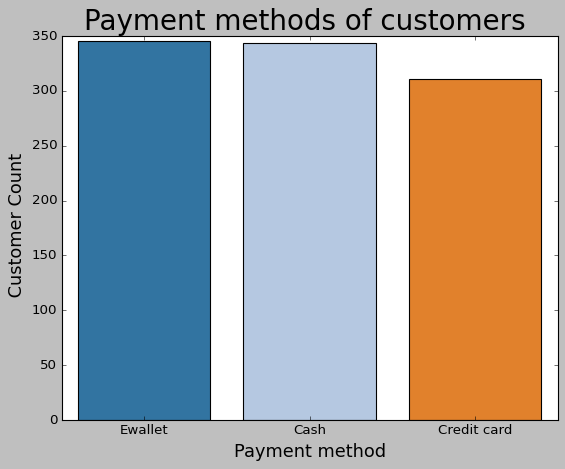

In [22]:

ax = sns.countplot(x = "Payment", data = dados, palette = "tab20")
ax.set_title(label = "Payment methods of customers ", fontsize= 25)
ax.set_xlabel(xlabel = "Payment method", fontsize = 16)
ax.set_ylabel(ylabel = " Customer Count", fontsize = 16)

### **Distribuição de meios de pagamento em todas as agências**

Text(0, 0.5, 'Peple Count')

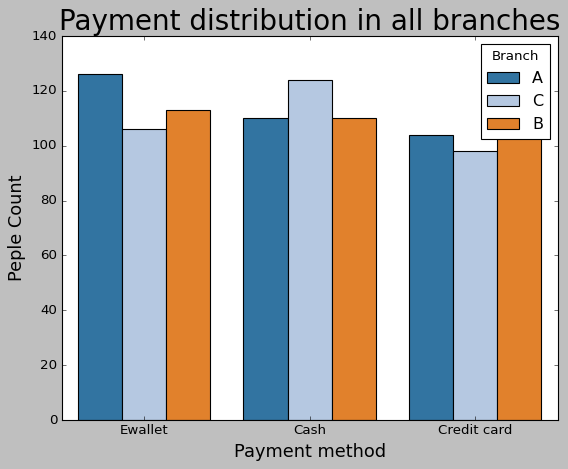

In [23]:

plt.style.use('classic')
ax = sns.countplot(x="Payment", hue = "Branch", data = dados, palette= "tab20")
ax.set_title(label = "Payment distribution in all branches", fontsize= 25)
ax.set_xlabel(xlabel = "Payment method", fontsize = 16)
ax.set_ylabel(ylabel = "Peple Count", fontsize = 16)

### **Agora vamos ver a distribuição de rating em 3 filiais**

Text(0, 0.5, 'Rating distribution')

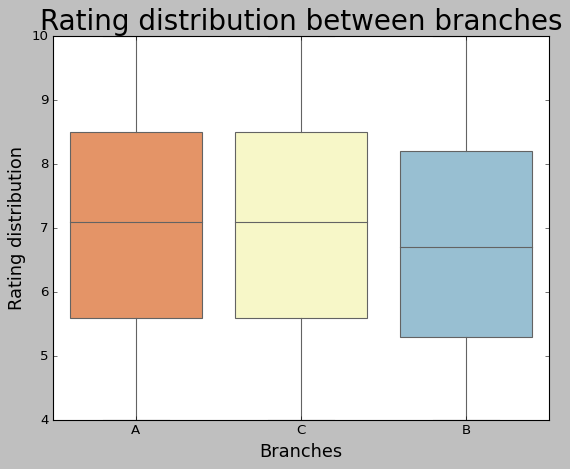

In [24]:

ax = sns.boxplot(x="Branch", y = "Rating" ,data =dados, palette= "RdYlBu")
ax.set_title("Rating distribution between branches", fontsize = 25)
ax.set_xlabel(xlabel = "Branches", fontsize = 16)
ax.set_ylabel(ylabel = "Rating distribution", fontsize = 16)

### Podemos ver que a classificação média das agências A e C é superior a sete e a agência B é inferior a 7.

### **Tempo máximo de vendas**

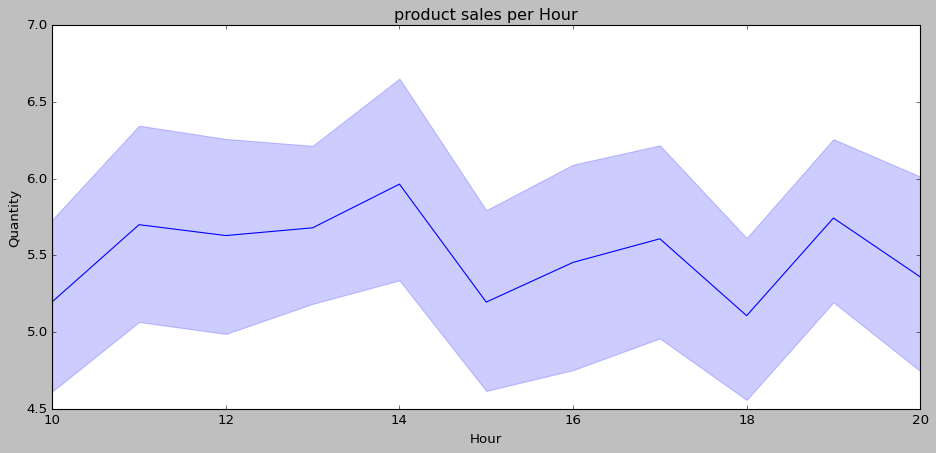

In [27]:
dados["Time"]= pd.to_datetime(dados["Time"])
dados["Hour"]= (dados["Time"]).dt.hour
plt.figure(figsize=(14,6))
plt.style.use('classic')
SalesTime = sns.lineplot(x="Hour", y ="Quantity", data = dados).set_title("product sales per Hour")

### Podemos ver que o supermercado faz a maior parte de suas vendas às 14:00 hrs, horário local.

### **Classificação x vendas**

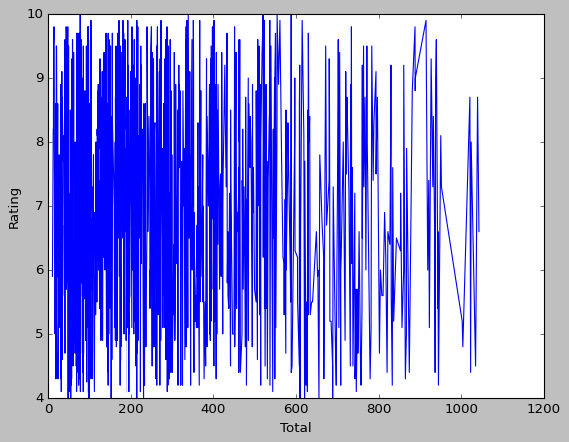

In [28]:

plt.style.use('classic')
rating_vs_sales = sns.lineplot(x="Total", y= "Rating", data=dados)

### **Usando boxen plot**

Text(0, 0.5, 'Product Line')

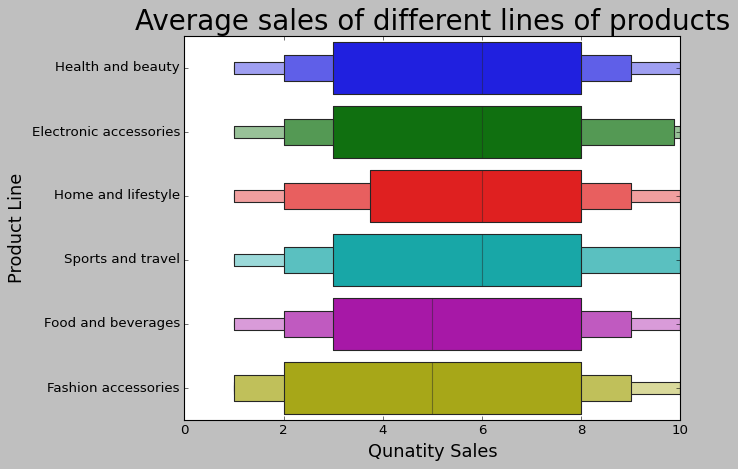

In [29]:

plt.style.use('classic')
ax = sns.boxenplot(x = "Quantity", y = "Product line", data = dados,)
ax.set_title(label = "Average sales of different lines of products", fontsize = 25)
ax.set_xlabel(xlabel = "Qunatity Sales",fontsize = 16)
ax.set_ylabel(ylabel = "Product Line", fontsize = 16)

### Aqui podemos ver a média de vendas de diferentes linhas de produtos. Saúde e beleza são as vendas mais altas, enquanto os acessórios Fashon são as vendas mais baixas.

### **Vamos ver a contagem de vendas desses produtos.**

Text(0, 0.5, 'Product Line')

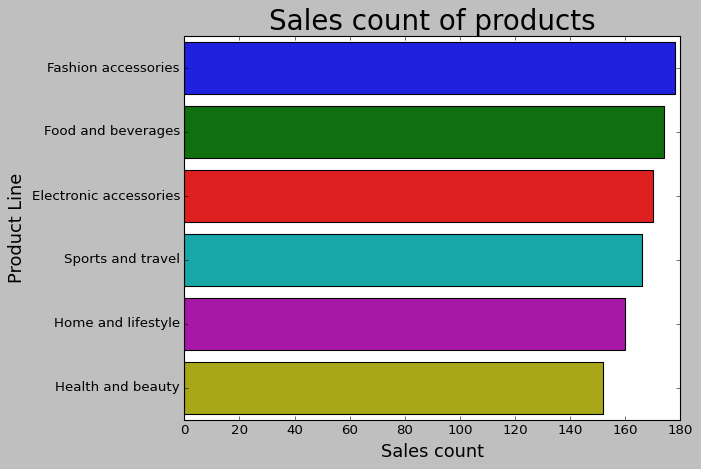

In [30]:

ax = sns.countplot(y='Product line', data=dados, order = dados['Product line'].value_counts().index)
ax.set_title(label = "Sales count of products", fontsize = 25)
ax.set_xlabel(xlabel = "Sales count", fontsize = 16)
ax.set_ylabel(ylabel= "Product Line", fontsize = 16)

### Podemos ver os produtos mais vendidos na figura acima.

### **Total de vendas do produto usando boxenplot**

Text(0, 0.5, 'Product Line')

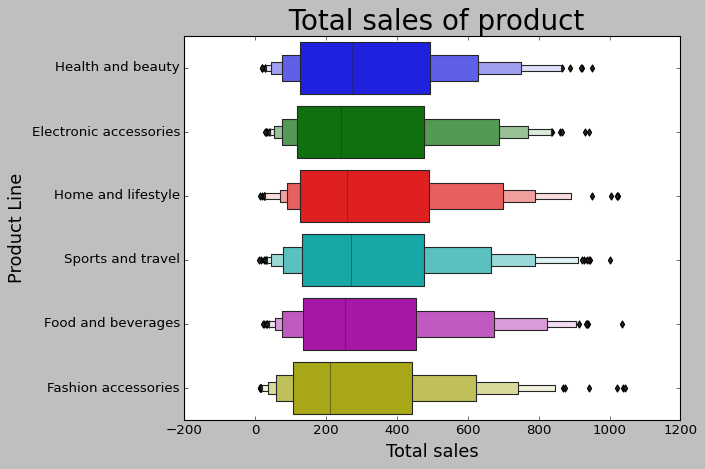

In [31]:

plt.style.use('classic')
ax = sns.boxenplot(y= "Product line", x= "Total", data = dados)
ax.set_title(label = " Total sales of product", fontsize = 25)
ax.set_xlabel(xlabel = "Total sales", fontsize = 16)
ax.set_ylabel(ylabel = "Product Line", fontsize = 16)

### **Agora vamos ver as avaliações médias dos produtos.**

Text(0, 0.5, 'Product line')

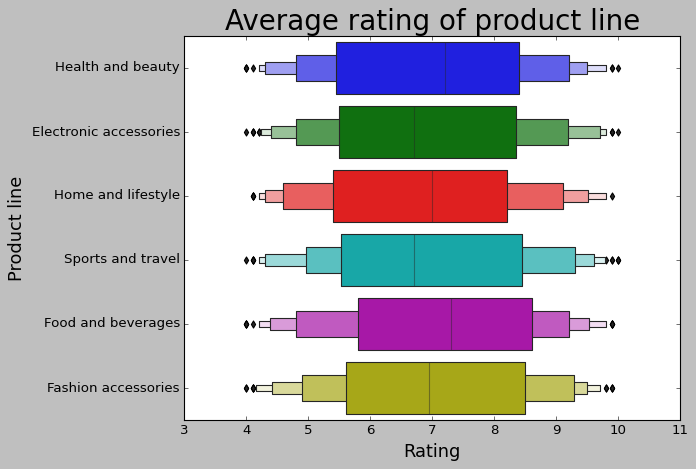

In [32]:

plt.style.use('classic')
ax = sns.boxenplot(y = "Product line", x = "Rating", data = dados)
ax.set_title("Average rating of product line", fontsize = 25)
ax.set_xlabel("Rating", fontsize = 16)
ax.set_ylabel("Product line", fontsize = 16)

### **Vendas de produtos com base no sexo**

Text(0, 0.5, 'Product Line')

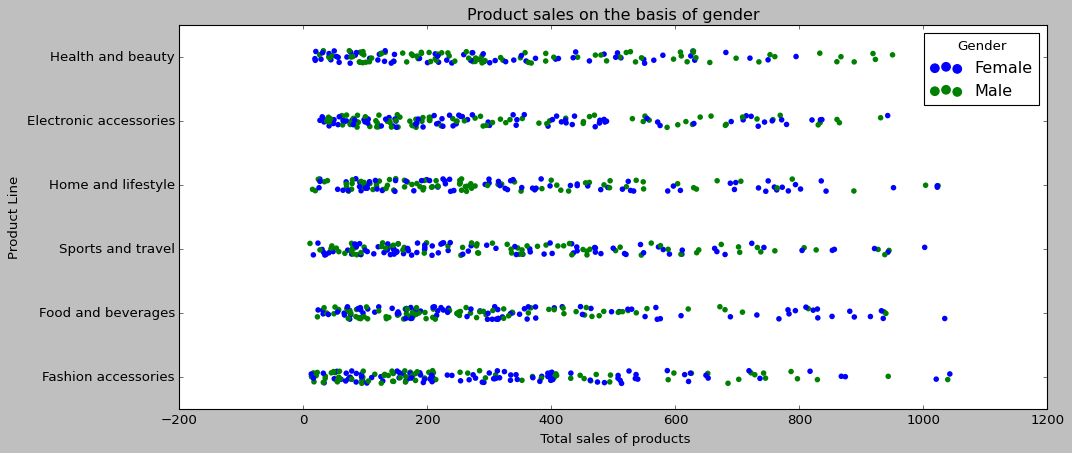

In [33]:

plt.figure(figsize = (14,6))
ax= sns.stripplot(y= "Product line", x = "Total", hue = "Gender", data = dados)
ax.set_title(label = "Product sales on the basis of gender")
ax.set_xlabel(xlabel = " Total sales of products")
ax.set_ylabel(ylabel = "Product Line")

### **Produto e receita bruta**

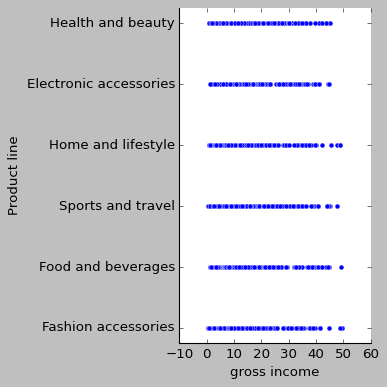

In [34]:

plt.style.use('classic')
ax = sns.relplot(y= "Product line", x = "gross income", data = dados)
# ax.set_title(label = "Products and Gross income")
# ax.set_xlabel(xlabel = "Total gross income")
# ax.set_ylabel(ylabel = "Product line")